In [1]:
import pandas as pd
import numpy as np
from Higgs.tools.ImplementationUtils import (
    implementChannelLimit,
    implementChannelWidthLimit,
    read_csv_from_web,
    fromHB5Table1
)
from Higgs import bounds as HB
from Higgs.tools.LimitValidation import validateChannelLimit, validateChannelWidthLimit
from scipy.interpolate import RectBivariateSpline
import os, sys

sys.path.insert(0, os.path.dirname(os.path.dirname(os.getcwd())))
import MassResolutions as resolution


# CMS 13TeV LHC

## high mass `gg -> H -> ZZ` [2109.08268](https://arxiv.org/abs/2109.08268)

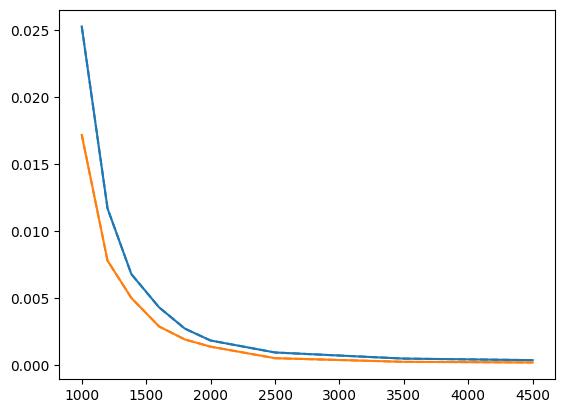

Looks good. Saving this to ggH_highM_LHC13_CMS_137.json


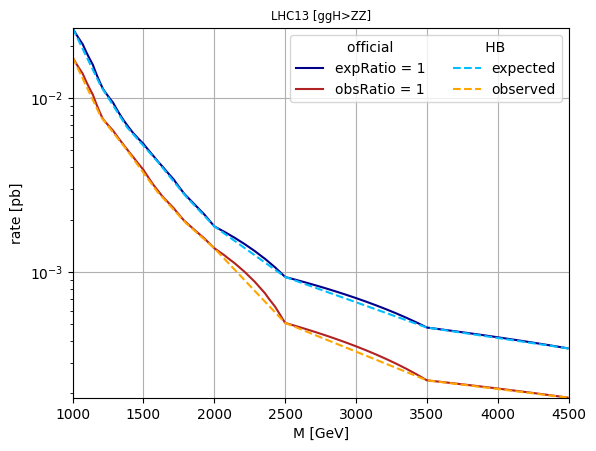

In [2]:
df = pd.DataFrame(
    {
        "m": [1000, 1200, 1385, 1600, 1800, 2000, 2500, 3500, 4500],
        "obs": 1e-3
        * np.array([17.2, 7.80, 5.01, 2.88, 1.91, 1.37, 0.509, 0.238, 0.189]),
        "exp": 1e-3
        * np.array([25.3, 11.7, 6.79, 4.31, 2.72, 1.83, 0.936, 0.479, 0.363]),
    }
)


limitFile = implementChannelLimit(
    "2109.08268",
    {"channels": [["ggH", "ZZ"]]},
    "Fig. 8a",
    df,
    massResolution={"absolute": 10, "relative": 0.1}, # qq nunu, guess
    idSuffix=1,
    prefix="ggH_highM",
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## high mass `vbfH -> ZZ` [2109.08268](https://arxiv.org/abs/2109.08268)

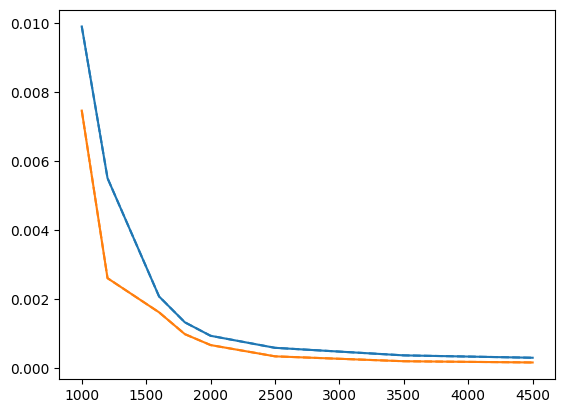

Looks good. Saving this to vbfH_highM_LHC13_CMS_137.json


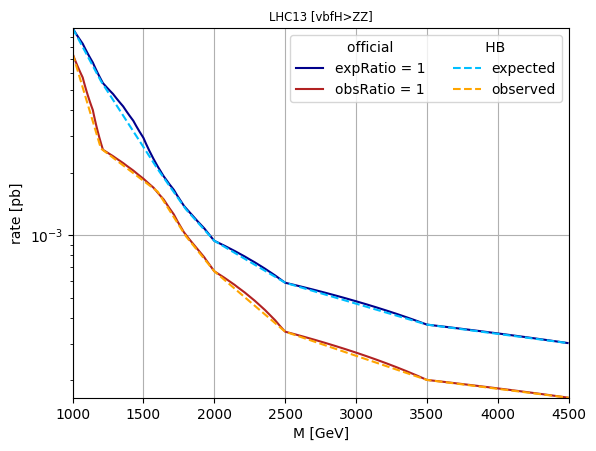

In [3]:
df = pd.DataFrame(
    {
        "m": [1000, 1200, 1600, 1800, 2000, 2500, 3500, 4500],
        "obs": [7.47e-3, 2.61e-3, 1.62e-3, 9.87e-4, 6.70e-4, 3.43e-4, 2.01e-4, 1.65e-4],
        "exp": [9.91e-3, 5.51e-3, 2.08e-3, 1.33e-3, 9.39e-4, 5.90e-4, 3.71e-4, 3.02e-4],
    }
)


limitFile = implementChannelLimit(
    "2109.08268",
    {"channels": [["vbfH", "ZZ"]]},
    "Fig. 8b",
    df,
    massResolution={"absolute": 10, "relative": 0.1},  # qq nunu, guess
    idSuffix=2,
    prefix="vbfH_highM",
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## `pp > H > ZZ` (width dep) [1804.01939](https://arxiv.org/abs/1804.01939)

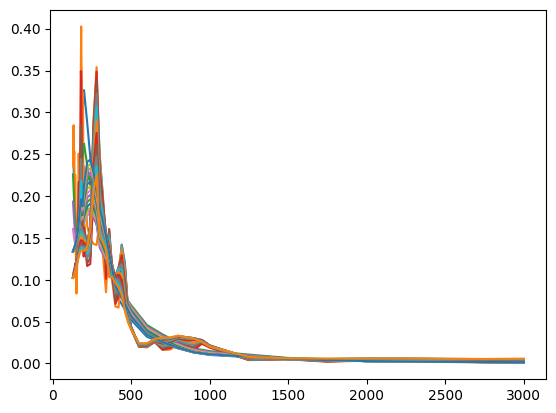

Looks good. Saving this to comb_LHC13_CMS_36.json


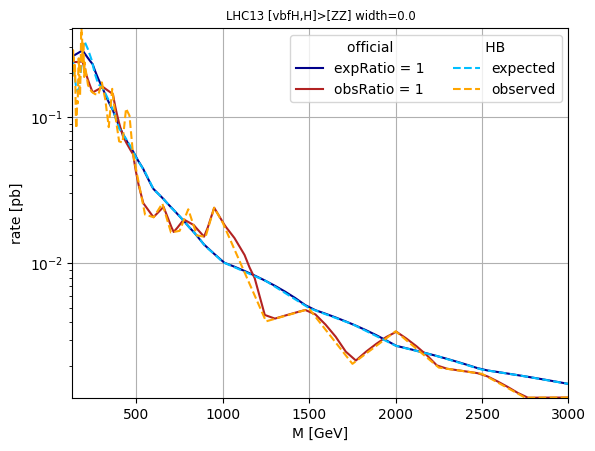

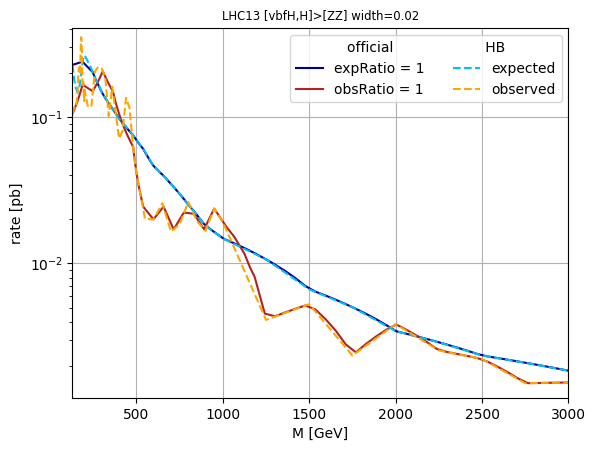

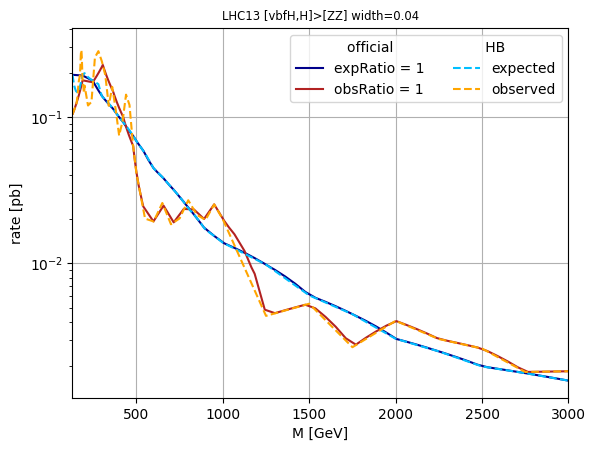

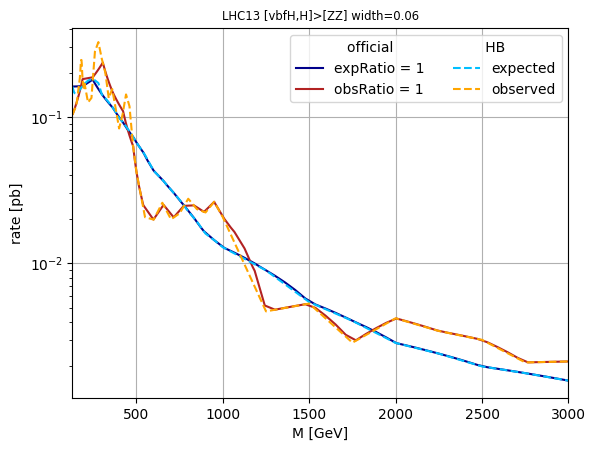

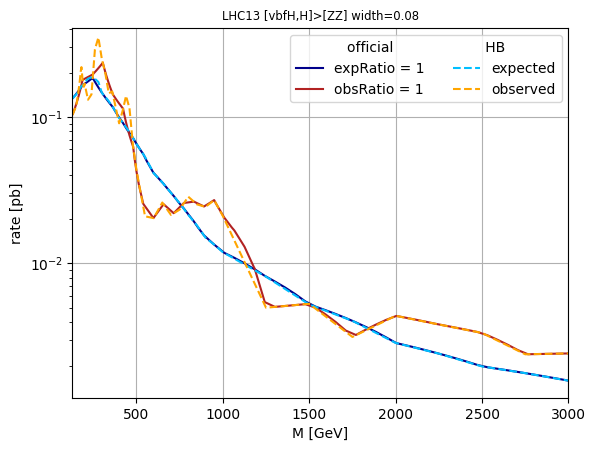

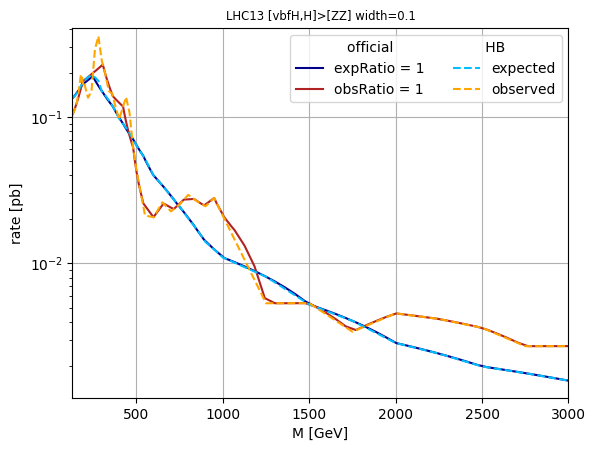

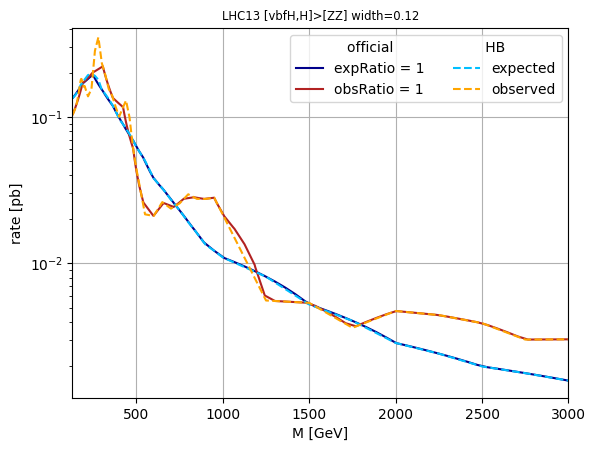

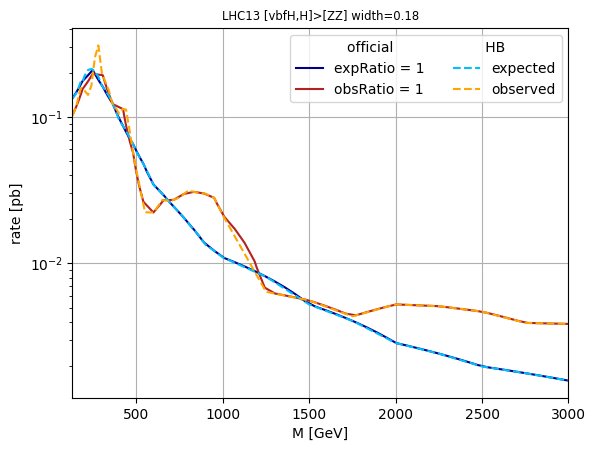

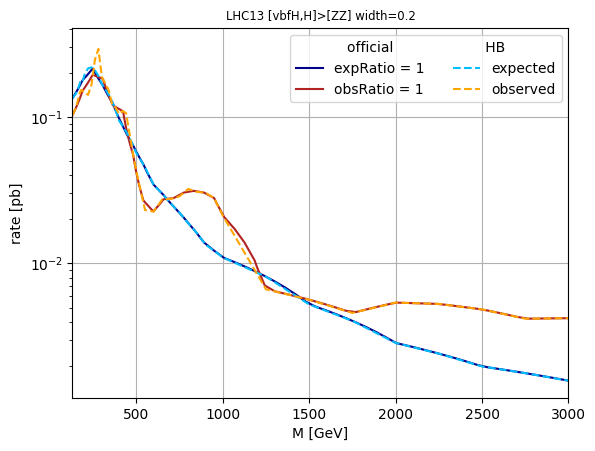

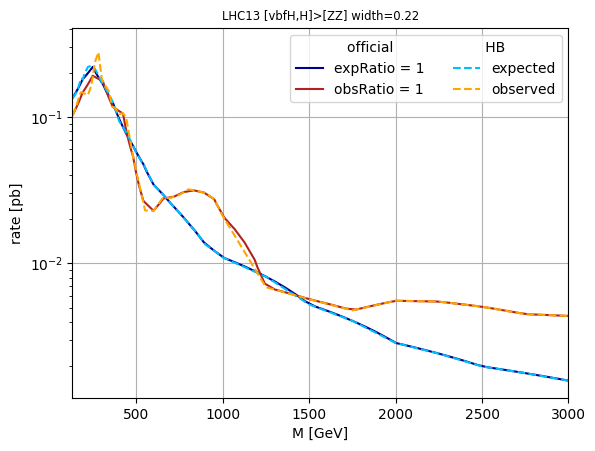

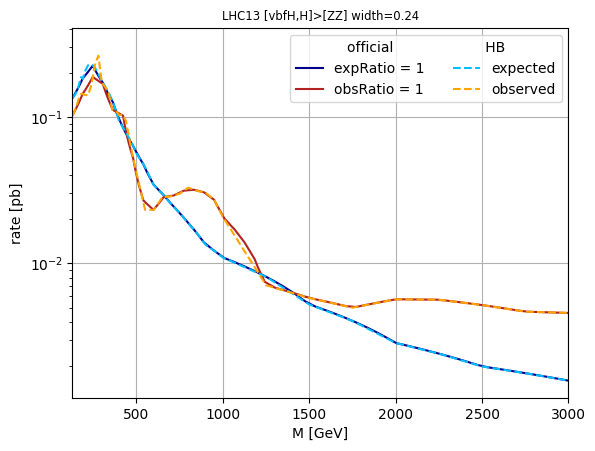

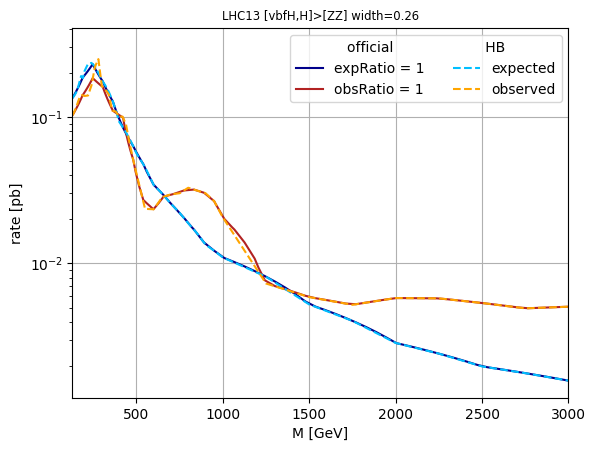

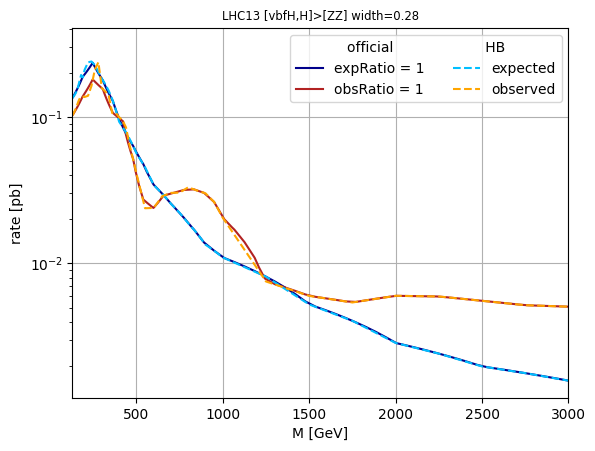

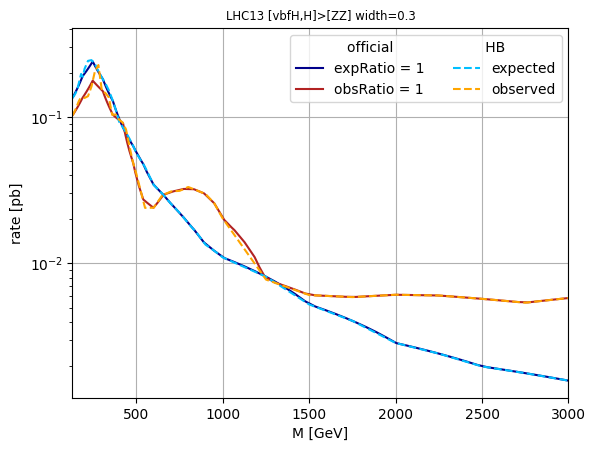

In [4]:
# proper 2d limits only for the observed one, so we reconstruct the expected
# limit from the given slices
df = read_csv_from_web(
    "https://www.hepdata.net/download/table/ins1666019/Table7/1/csv",
    skiprows=10,
    names=["m", "width", "obs"],
    comment="#",
)
df["normWidth"] = df.width / df.m
df.normWidth = round(df.normWidth, 2)
df.obs *= 1e-3  # fb to pb

dfExp0 = read_csv_from_web(
    "https://www.hepdata.net/download/table/ins1666019/Table1/1/csv",
    skiprows=10,
    skipfooter=107 - 40,
    engine="python",
    names=["m", "exp", "unc-", "unc+"],
    comment="#",
)

dfExp10 = read_csv_from_web(
    "https://www.hepdata.net/download/table/ins1666019/Table3/1/csv",
    skiprows=10,
    skipfooter=107 - 40,
    engine="python",
    names=["m", "exp", "unc-", "unc+"],
    comment="#",
)


dfExp100 = read_csv_from_web(
    "https://www.hepdata.net/download/table/ins1666019/Table5/1/csv",
    skiprows=10,
    skipfooter=107 - 40,
    engine="python",
    names=["m", "exp", "unc-", "unc+"],
    comment="#",
)

assert np.allclose(dfExp10.m, dfExp0.m)
assert np.allclose(dfExp100.m, dfExp0.m)

# linearly interpolate the expected limit onto the observed points
exp = RectBivariateSpline(
    np.unique(dfExp0.m),
    [0, 10, 100],
    np.transpose(
        [dfExp0.exp.to_numpy(), dfExp10.exp.to_numpy(), dfExp100.exp.to_numpy()],
    ),
    ky=1,
    kx=1,
)

df["exp"] = exp(df.m, df.width, grid=False)
del df["width"]

process = {
    "channels": [
        ["H", "ZZ"],
        ["vbfH", "ZZ"],
    ],
}
limitFile = implementChannelWidthLimit(
    "1804.01939",
    process,
    "https://doi.org/10.17182/hepdata.83810",
    df,
    idSuffix=1,
    massResolution=resolution.ZZ["4l"],
)
lim = HB.Limit(limitFile)
validateChannelWidthLimit(lim)


## `vbfH>ZZ` (width dep) [1804.01939](https://arxiv.org/abs/1804.01939)

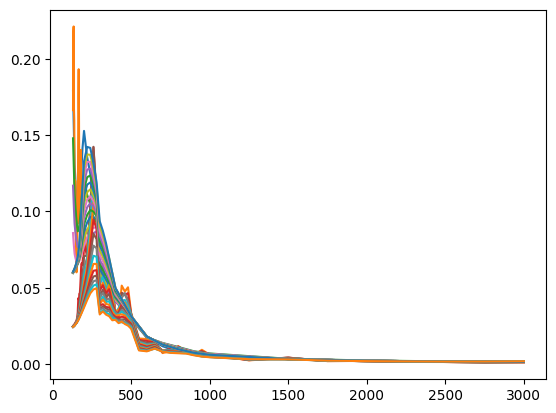

Looks good. Saving this to vbfH_LHC13_CMS_36.json


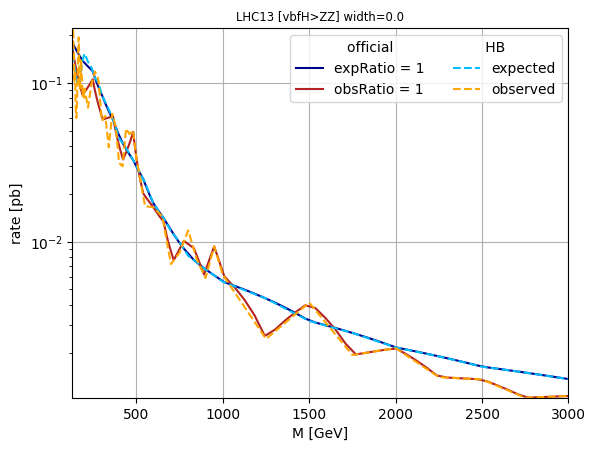

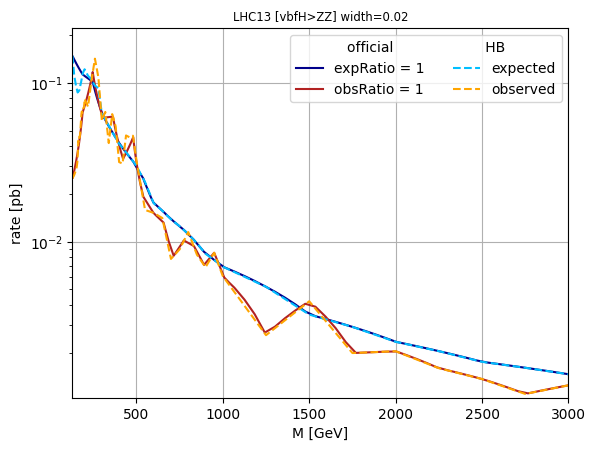

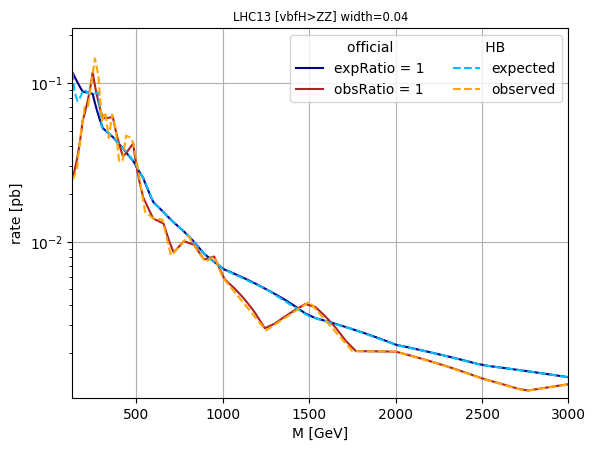

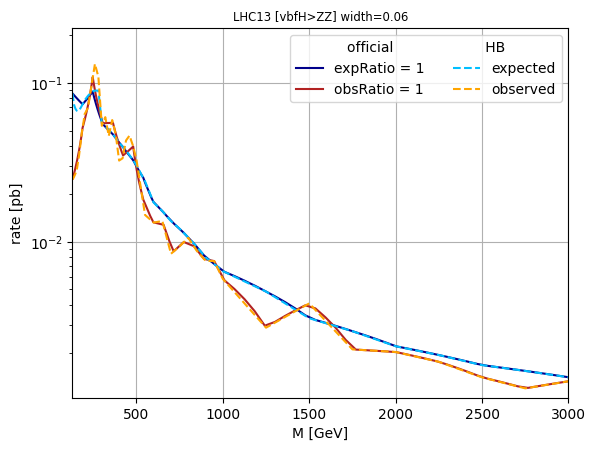

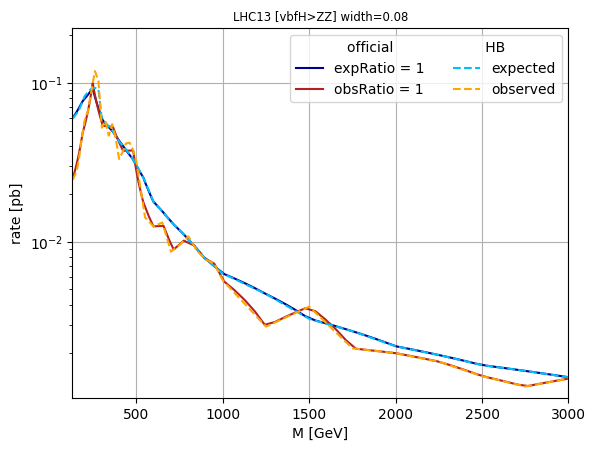

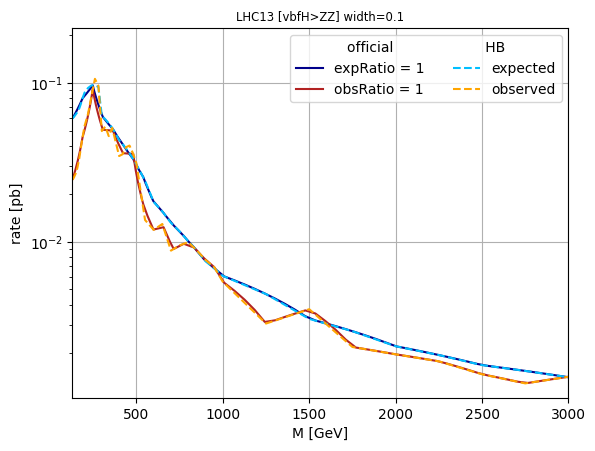

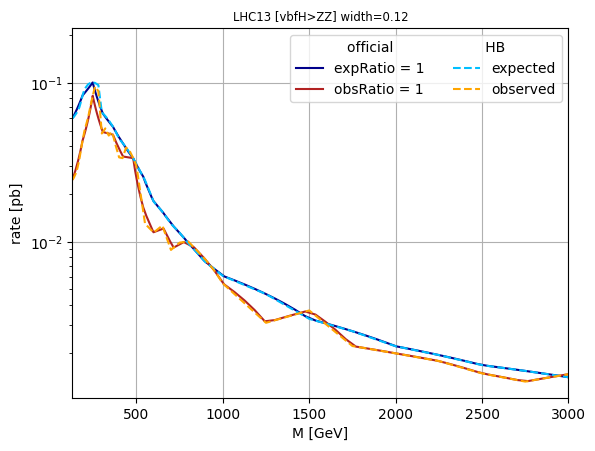

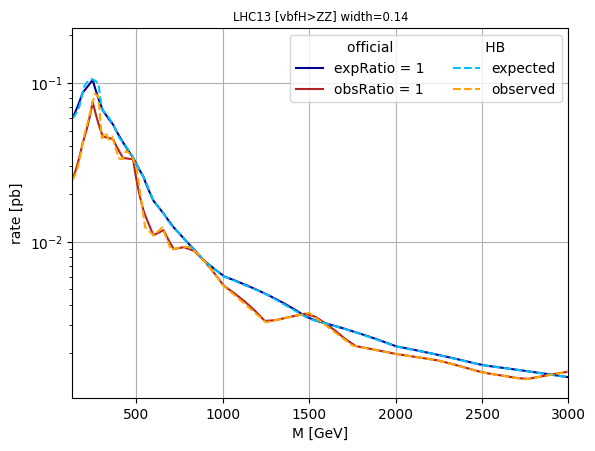

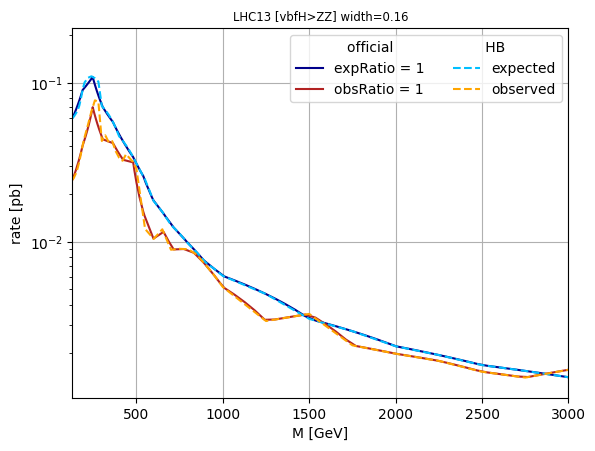

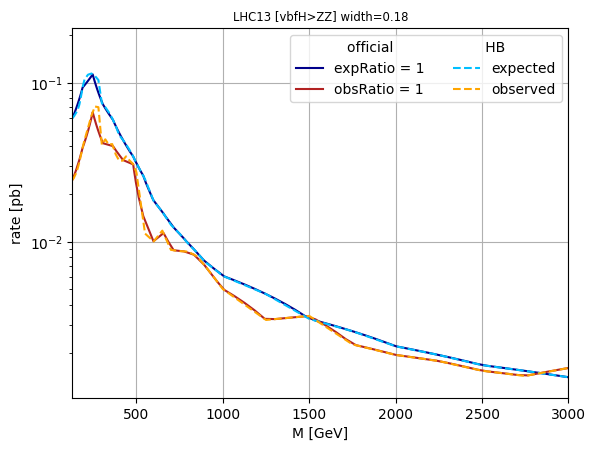

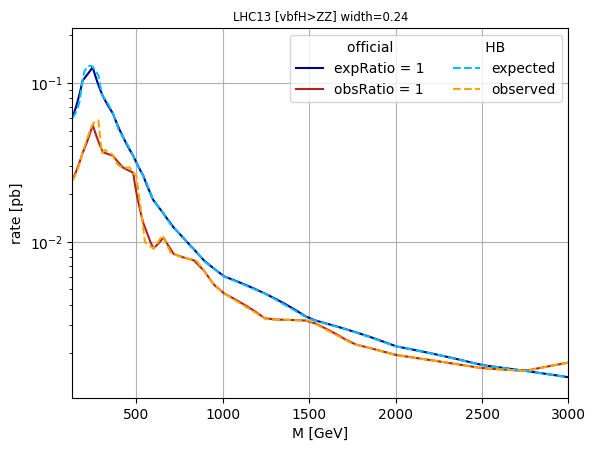

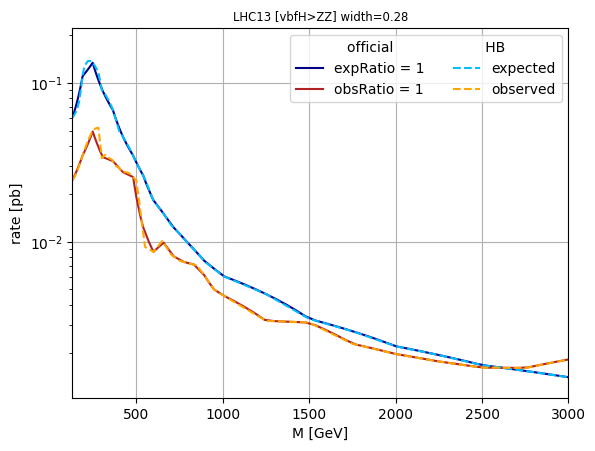

In [5]:
# proper 2d limits only for the observed one, so we reconstruct the expected
# limit from the given slices
df = read_csv_from_web(
    "https://www.hepdata.net/download/table/ins1666019/Table8/1/csv",
    skiprows=10,
    names=["m", "width", "obs"],
    comment="#",
)
df["normWidth"] = df.width / df.m
df.normWidth = round(df.normWidth, 2)
df.obs *= 1e-3  # fb to pb

dfExp0 = read_csv_from_web(
    "https://www.hepdata.net/download/table/ins1666019/Table2/1/csv",
    skiprows=10,
    skipfooter=107 - 40,
    engine="python",
    names=["m", "exp", "unc-", "unc+"],
    comment="#",
)

dfExp10 = read_csv_from_web(
    "https://www.hepdata.net/download/table/ins1666019/Table4/1/csv",
    skiprows=10,
    skipfooter=107 - 40,
    engine="python",
    names=["m", "exp", "unc-", "unc+"],
    comment="#",
)


dfExp100 = read_csv_from_web(
    "https://www.hepdata.net/download/table/ins1666019/Table6/1/csv",
    skiprows=10,
    skipfooter=107 - 40,
    engine="python",
    names=["m", "exp", "unc-", "unc+"],
    comment="#",
)

assert np.allclose(dfExp10.m, dfExp0.m)
assert np.allclose(dfExp100.m, dfExp0.m)

# linearly interpolate the expected limit onto the observed points
exp = RectBivariateSpline(
    np.unique(dfExp0.m),
    [0, 10, 100],
    np.transpose(
        [dfExp0.exp.to_numpy(), dfExp10.exp.to_numpy(), dfExp100.exp.to_numpy()],
    ),
    ky=1,
    kx=1,
)

df["exp"] = exp(df.m, df.width, grid=False)
del df["width"]

limitFile = implementChannelWidthLimit(
    "1804.01939",
    {"channels": [["vbfH", "ZZ"]]},
    "https://doi.org/10.17182/hepdata.83810",
    df,
    idSuffix=2,
    massResolution=resolution.ZZ["4l"],
)
lim = HB.Limit(limitFile)
validateChannelWidthLimit(lim)

# CMS 8TeV LHC

## `pp > H > ZZ > 4l` 7+8TeV [1312.5353](https://arxiv.org/abs/1312.5353)

Multiple different luminosity values: [19.7, 5.1] using 19.7 unless you set it manually


Looks good. Saving this to comb_LHC8_CMS_25.json
using effective coupling input for SM-normalized limit


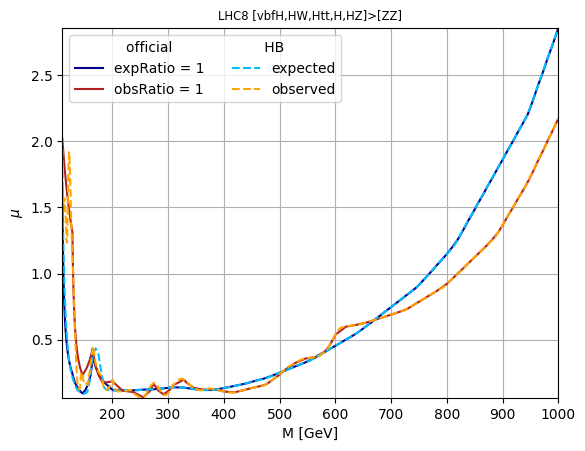

In [6]:
dflowM = fromHB5Table1("13002-1_CMS_H-ZZ-4l_lowm_25fb-1", "CMS")
dfhighM = fromHB5Table1("13002-2_CMS_H-ZZ-4l_highm_25fb-1", "CMS")
df = pd.concat([dflowM.iloc[:-1], dfhighM]).reset_index(drop=True)
df[df.m == 150] = (
    dflowM[dflowM.m == 150].values + dfhighM[dfhighM.m == 150].values
) / 2.0

prodModes = ["H", "vbfH", "HZ", "HW", "Htt"]
process = {"channels": [[p, "ZZ"] for p in prodModes]}
limitFile = implementChannelLimit(
    "1312.5353",
    process,
    "Fig. 18 (left)",
    df,
    constraints={"modelLike": "SMHiggsInterp", "process": "signal"},
    massResolution=resolution.ZZ["4l"],
    luminosity=5.1 + 19.7,
    normalization={"reference": "SMHiggsInterp", "process": "signal"},
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)
